## 分类准确度

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
# 加载手写数字图像原始数据集
digits = datasets.load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
X = digits.data
X.shape

(1797, 64)

In [5]:
y = digits.target
y.shape

(1797,)

In [6]:
# 我们来看一下具体一个样本数据是怎样的
X[100]

array([ 0.,  0.,  0.,  2., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15.,
        0.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  2.,  0.,  0.,  0.,  0.,
       15., 12.,  1., 16.,  4.,  0.,  0.,  4., 16.,  2.,  9., 16.,  8.,
        0.,  0.,  0., 10., 14., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
       13.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.])

In [7]:
y[100]

4

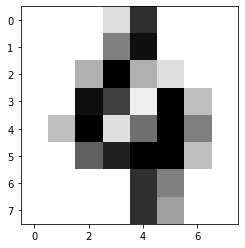

In [8]:
import matplotlib
some_digit_image = X[100].reshape(8, 8)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary)
plt.show()

In [9]:
# train test split
from playML.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_ratio=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1438, 64)
(1438,)
(359, 64)
(359,)


In [10]:
# 使用 kNN
from playML.kNN import kNNClassifier
my_knn_clf = kNNClassifier(k=3)
my_knn_clf.fit(X_train, y_train)
y_predict = my_knn_clf.predict(X_test)
correct_count = sum(y_predict == y_test)
correct_count

356

In [11]:
# 得到准确率
correct_count / len(y_test)

0.9916434540389972

In [12]:
# 调用我们自己封装的计算准确率的方法
from playML.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.9916434540389972

In [13]:
# 有时候，只关心模型的准确度，不关心预测的结果，所以把计算准确度的过程也定义为 kNN 类的一个方法
my_knn_clf.score(X_test, y_test)

0.9916434540389972

## sklearn 中的 accuracy_score

In [22]:
from sklearn.model_selection import train_test_split as skl_train_test_split
X_train, X_test, y_train, y_test = skl_train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1437, 64)
(1437,)
(360, 64)
(360,)


In [23]:
from sklearn.neighbors import KNeighborsClassifier
skl_knn_clf = KNeighborsClassifier(n_neighbors=3)
skl_knn_clf.fit(X_train, y_train)
y_predict = skl_knn_clf.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score as skl_accuracy_score
skl_accuracy_score(y_test, y_predict)

0.9861111111111112

In [26]:
# sklearn 的 kNN 也有直接计算准确率的方法
skl_knn_clf.score(X_test, y_test)

0.9861111111111112